# Cross Section example using reanalysis GRIB data from CDS

Demonstrates how to use Metview to compute and plot a vertical cross section of an ERA5 GRIB file retrieved from the [Climate Data Store](https://cds.climate.copernicus.eu/) (CDS).

In [7]:
import metview as mv
import cdsapi

Retrieve ERA5 temperature data in GRIB format using the [CDS API](https://cds.climate.copernicus.eu/api-how-to) (access needs to be set up first). If you do not have access to the CDS-API then initialise variable use_cds = False. A copy of the data is provided on disk.

In [8]:
use_cds = False
filename = "era5_temp_from_cds.grib"
if use_cds: 
    c = cdsapi.Client()
    c.retrieve("reanalysis-era5-pressure-levels",
        {
          "variable": "temperature",
          "pressure_level":['1','2','3','5','7','10','20','30','50','70','100','150',
                        '200','250','300','400','500','600','700','800','850',
                        '900','925','950','1000'
                      ],
          "product_type": "reanalysis",
          "date": "20171231",
          "time": "00:00",
          "format": "grib"
        },
        filename)
    fs = mv.read(filename)
else:
    if mv.exist(filename):
        fs = mv.read(filename)
    else:
        fs = mv.gallery.load_dataset(filename)

Metview reads the GRIB data into its [Fieldset](../data_types/fieldset.rst) class.

Define an [mxsectview()](../gen_files/icon_functions/mxsectview.rst), setting parameters required for the cross section computation and visualisation, including a geographical line along which a cross section of the data is computed (remember that the data consists of a number of vertical levels).

In [9]:
xsection_view = mv.mxsectview(
    vertical_scaling = "log",
    bottom_level     = 1000.0,
    top_level        = 1,
    line             = [-40, -105, 61, 85] #lat,lon,lat,lon
)

Sets up an [mcont()](../gen_files/icon_functions/mcont.rst), which provides much flexibility in choosing how to display the output data. It controls features such as isolines, shading and colour schemes.

In [10]:
shading = mv.mcont(
    legend                         = "on",
    contour                        = "off",
    contour_level_count            = 12,
    contour_label                  = "off",
    contour_shade                  = "on",
    contour_shade_method           = "area_fill",
    contour_shade_max_level_colour = "red",
    contour_shade_min_level_colour = "white"
)

To plot this, we first need to tell Metview to send the plot to Jupyter.

In [11]:
mv.setoutput('jupyter')

Plot the data into the Cross Section View with a customized contouring style.

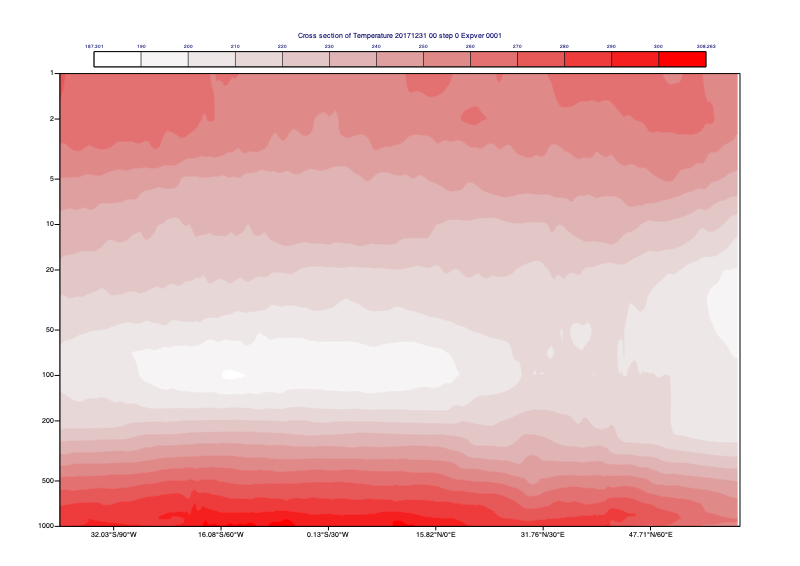

In [12]:
mv.plot(xsection_view, fs, shading)